In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

edges = pd.read_csv('pedalme_edges.csv')
features = pd.read_csv('pedalme_features.csv') 
df = edges.append(features)
df.head()

/tmp/ipykernel_4734/2528317175.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = edges.append(features)


,from,to,weight,Unnamed,year,week,location,time,demand
0,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.425459,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.157355,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.206500,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.564148,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.Unnamed = features.Unnamed
df.year = features.year
df.week = features.week
df.location =features.location
df.time = features.time
df.demand = features.demand
df.head()

,from,to,weight,Unnamed,year,week,location,time,demand
0,0.0,0.0,1.000000,15,2020,22,0,0,12
1,0.0,1.0,0.425459,16,2020,22,1,0,2
2,0.0,2.0,0.157355,17,2020,22,2,0,0
3,0.0,3.0,0.206500,18,2020,22,3,0,1
4,0.0,4.0,0.564148,19,2020,22,4,0,0


In [3]:
df.isnull().sum()

from        540
to          540
weight      540
Unnamed       0
year          0
week          0
location      0
time          0
demand        0
dtype: int64

In [4]:
df.shape

(765, 9)

In [5]:
df = df.dropna(axis=0)

In [6]:
cat_cols = list()
for col in df.columns:
    if df[col].nunique() < 10:
        cat_cols.append(col)
        print(f'{col} {df[col].unique()}')

year [2020]


In [7]:
df_noyear = df.drop(['year'],axis=1)
df_noyear.head()

,from,to,weight,Unnamed,week,location,time,demand
0,0.0,0.0,1.000000,15,22,0,0,12
1,0.0,1.0,0.425459,16,22,1,0,2
2,0.0,2.0,0.157355,17,22,2,0,0
3,0.0,3.0,0.206500,18,22,3,0,1
4,0.0,4.0,0.564148,19,22,4,0,0


In [8]:
df_noyear.time.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler()
for col in df_noyear.columns:
    df_noyear[col] = scaller.fit_transform(df_noyear[col][:,np.newaxis])

/tmp/ipykernel_4734/3791217293.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_noyear[col] = scaller.fit_transform(df_noyear[col][:,np.newaxis])
/tmp/ipykernel_4734/3791217293.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_noyear[col] = scaller.fit_transform(df_noyear[col][:,np.newaxis])
/tmp/ipykernel_4734/3791217293.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_noyear[col] = scaller.fit_transform(df_noyear[col][:,np.newaxis])
/tmp/ipykernel_4734/3791217293.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

Text(0, 0.5, 'to')

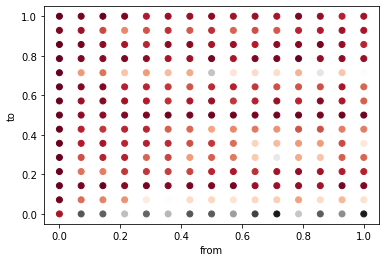

In [10]:
plt.scatter(df_noyear['from'], df_noyear['to'], c=df_noyear.demand, cmap='RdGy')
plt.xlabel('from'); plt.ylabel('to')

Text(0, 0.5, 'Unnamed')

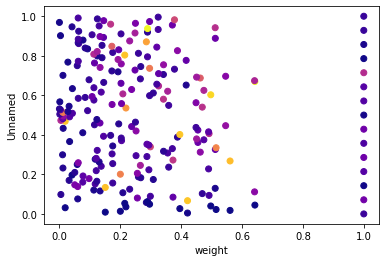

In [11]:
plt.scatter(df_noyear['weight'], df_noyear['Unnamed'], c=df_noyear.demand, cmap='plasma')
plt.xlabel('weight'); plt.ylabel('Unnamed')

Text(0, 0.5, 'Unnamed')

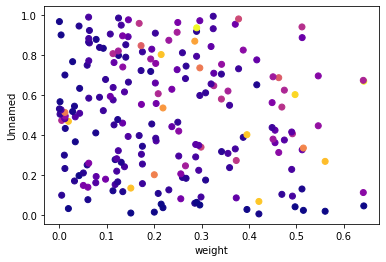

In [13]:
df_out = df_noyear[df_noyear.weight < 0.8]
plt.scatter(df_out['weight'], df_out['Unnamed'], c=df_out.demand, cmap='plasma')
plt.xlabel('weight'); plt.ylabel('Unnamed')

Text(0, 0.5, 'time')

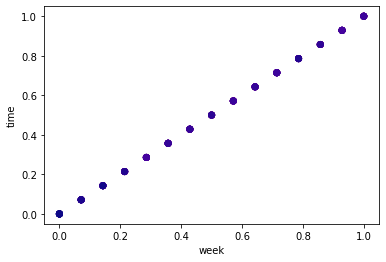

In [14]:
plt.scatter(df_out['week'], df_out['time'], c=df_out.demand, cmap='plasma')
plt.xlabel('week'); plt.ylabel('time')

Text(0, 0.5, 'time')

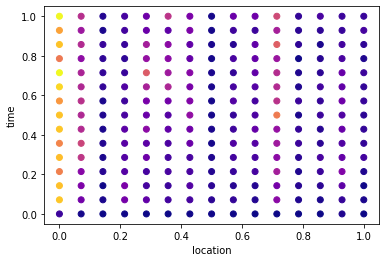

In [15]:
plt.scatter(df_noyear['location'], df_noyear['time'], c=df_noyear.demand, cmap='plasma')
plt.xlabel('location'); plt.ylabel('time')

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

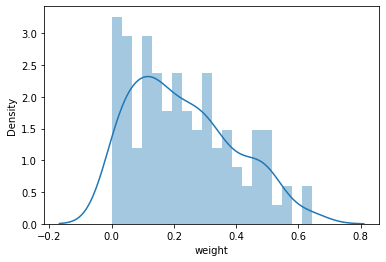

In [17]:
sns.distplot(df_out.weight, bins=20)

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

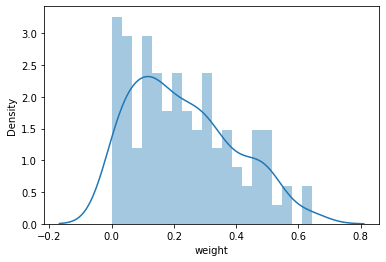

In [18]:
Q1 = np.percentile(df_out.weight, 25, axis=0)
Q3 = np.percentile(df_out.weight, 75, axis=0)
IQR = Q3 - Q1 # getting the interquatile range of the data

upperlimit = Q3 + IQR * 1.5
lowerlimit = Q1 - IQR* 1.5
df_nooutlier = df_out[(df_out.weight < upperlimit) & (df_out.weight > lowerlimit)]
sns.distplot(df_nooutlier.weight, bins=20)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

linear = LinearRegression()
ridge = Ridge()
decision = DecisionTreeRegressor()
ensemb = RandomForestRegressor()
neigh = KNeighborsRegressor()

models = [linear, ridge, decision, ensemb, neigh]

In [21]:
X = df_nooutlier.drop(['demand'], axis=1)
y = df_nooutlier.demand

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}: {r2_score(y_test, y_pred)} {mean_absolute_error(y_test, y_pred)}')

LinearRegression(): 0.32379334217690736 0.12369908883982825
Ridge(): 0.31418427469164123 0.12301912061640544
DecisionTreeRegressor(): 0.6699702713516767 0.08251289263947492
RandomForestRegressor(): 0.7047165356050236 0.0852573839662447
KNeighborsRegressor(): 0.03796892469374735 0.14663853727144865


In [24]:
import pickle
pickle.dump(ensemb, open('randomforest.pkl','wb'))